In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.interpolate

plot = "plot/"
npy = "npy/"

In [2]:
solar_rad = pd.read_csv("xunlian.csv")
solar_rad

,Date,Time,Solar_Rad.
0,2010/1/1,12:01 AM,0
1,2010/1/1,12:02 AM,0
2,2010/1/1,12:03 AM,0
3,2010/1/1,12:04 AM,0
4,2010/1/1,12:05 AM,0
...,...,...,...
480936,2010/11/30,11:55 PM,0
480937,2010/11/30,11:56 PM,0
480938,2010/11/30,11:57 PM,0
480939,2010/11/30,11:58 PM,0


In [3]:
solar_rad_array = np.array(solar_rad)
solar_rad_value_array = np.array(solar_rad_array[:,2], dtype=int)/max(solar_rad_array[:,2])*20000

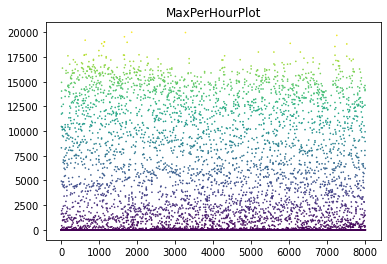

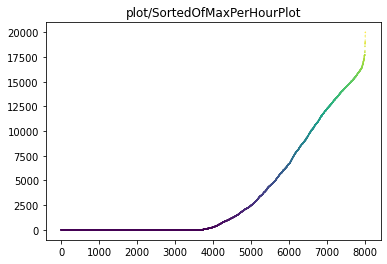

In [4]:
max_per_hour = []
for value in range(len(solar_rad_value_array)//60):
    max_per_hour.append(list(solar_rad_value_array[60*value:60*value+60]))
data = np.max(max_per_hour, axis=1)
color = np.array(data, dtype=int)
plt.scatter(np.arange(len(data)), data, c=np.array(data), s=0.4)
plt.title("MaxPerHourPlot")
plt.savefig(f"{plot}MaxPerHourPlot.png")
plt.show()
plt.scatter(np.arange(len(data)), np.sort(data), c=np.sort(np.array(data)), s=0.1)
plt.title(f"{plot}SortedOfMaxPerHourPlot")
plt.savefig(f"{plot}SortedOfMaxPerHourPlot.png")
plt.show()

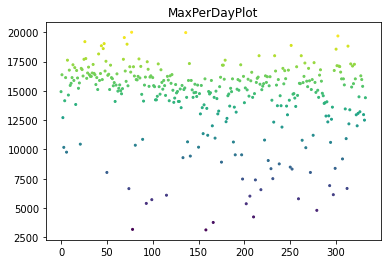

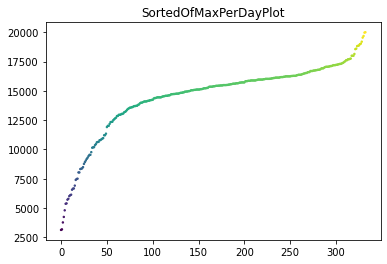

In [5]:
max_per_day = []
for value in range(len(solar_rad_value_array)//(60*24)):
    max_per_day.append(list(solar_rad_value_array[(60*24)*value:(60*24)*value+(60*24)]))
data = np.max(max_per_day, axis=1)
color = np.array(data, dtype=int)
plt.scatter(np.arange(len(data)), data, c=np.array(data), s=4)
plt.title("MaxPerDayPlot")
plt.savefig(f"{plot}MaxPerDayPlot.png")
plt.show()
plt.scatter(np.arange(len(data)), np.sort(data), c=np.sort(np.array(data)), s=2)
plt.title("SortedOfMaxPerDayPlot")
plt.savefig(f"{plot}SortedOfMaxPerDayPlot.png")
plt.show()

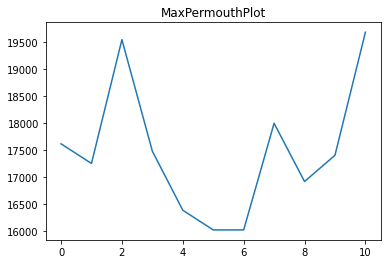

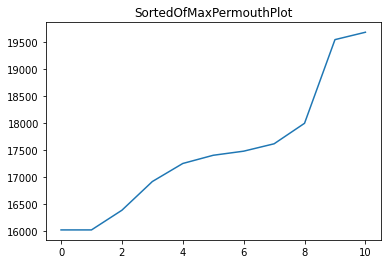

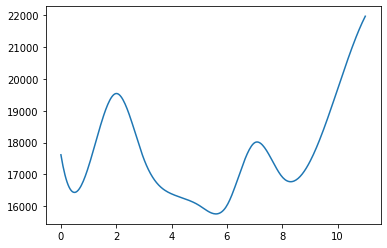

In [6]:
max_per_mouth = []
for value in range(len(solar_rad_value_array)//(60*24*30)):
    max_per_mouth.append(list(solar_rad_value_array[(60*24*30)*value:(60*24*30)*value+(60*24*10)]))
data = np.max(max_per_mouth, axis=1)
color = np.array(data, dtype=int)
plt.plot(data)
plt.title("MaxPermouthPlot")
plt.savefig(f"{plot}MaxPermouthPlot.png")
plt.show()
plt.plot(np.sort(data))
plt.title("SortedOfMaxPermouthPlot")
plt.savefig(f"{plot}SortedOfMaxPermouthPlot.png")
plt.show()
x_new = np.linspace(0, len(data), 300)
a_BSpline = scipy.interpolate.make_interp_spline(np.arange(len(data)), data)
y_new = a_BSpline(x_new)
plt.plot(x_new, y_new)
plt.savefig(f"{plot}SmoothedMaxPermouthPlot.png")
plt.show()

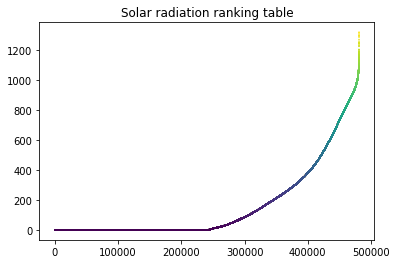

In [7]:
color = np.array(solar_rad.values[:,2]/max(solar_rad.values[:,2])*1000, dtype=int)
plt.scatter(np.arange(len(solar_rad)), np.sort(np.array(solar_rad.values[:,2]), -1), c=np.sort(color, -1), s=0.1)
plt.title("Solar radiation ranking table")
plt.savefig(f"{plot}SolarRadiationRankingTable.png")
plt.show()

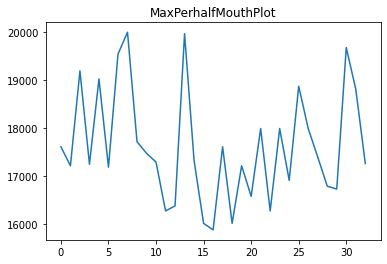

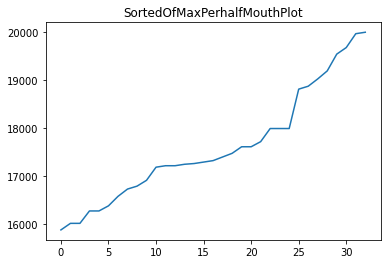

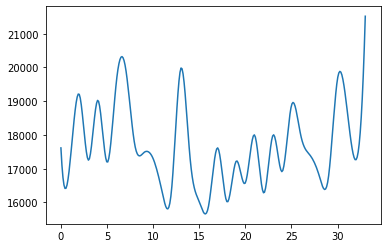

In [8]:
max_per_halfMouth = []
for value in range(len(solar_rad_value_array)//(60*24*10)):
    max_per_halfMouth.append(list(solar_rad_value_array[(60*24*10)*value:(60*24*10)*value+(60*24*10)]))
data = np.max(np.array(max_per_halfMouth), axis=1)
color = np.array(data, dtype=int)
plt.plot(data)
plt.title("MaxPerhalfMouthPlot")
plt.savefig(f"{plot}MaxPerhalfMouthPlot.png")
plt.show()
plt.plot(np.sort(data))
plt.title("SortedOfMaxPerhalfMouthPlot")
plt.savefig(f"{plot}SortedOfMaxPerhalfMouthPlot.png")
plt.show()
x_new = np.linspace(0, len(data), 300)
a_BSpline = scipy.interpolate.make_interp_spline(np.arange(len(data)), data)
y_new = a_BSpline(x_new)
plt.plot(x_new, y_new)
plt.savefig(f"{plot}SmoothedMaxPerhalfMouthPlot.png")
plt.show()

In [12]:
import PyEMD
import uuid
emd_obj = PyEMD.EMD()
imfs = emd_obj.emd(np.array(solar_rad_value_array), max_imf=5)
np.save(f"{npy}imfs{uuid.uuid4()}.png", imfs)

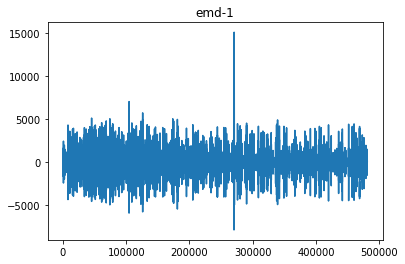

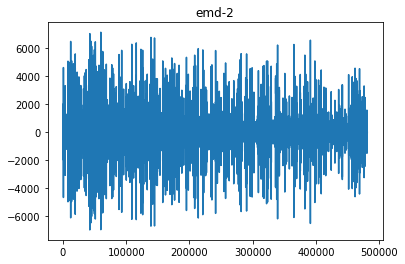

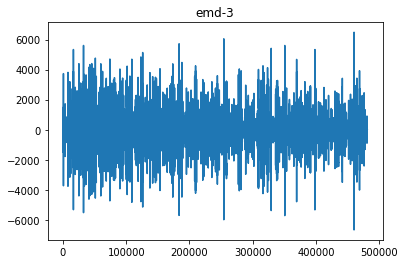

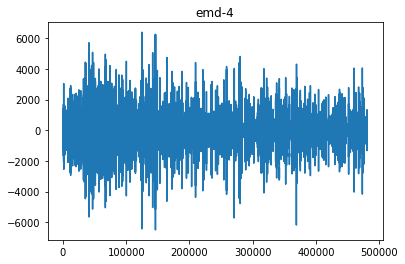

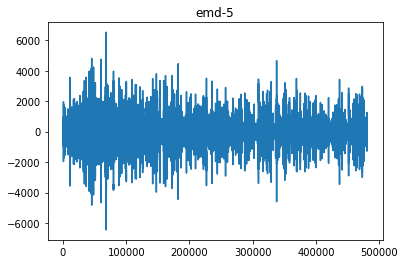

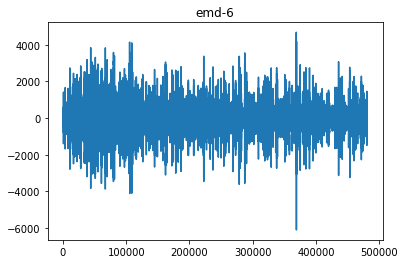

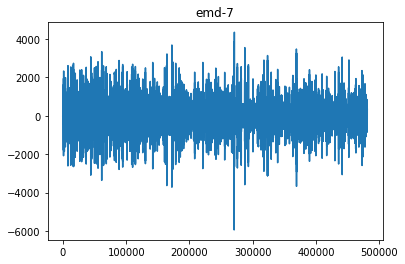

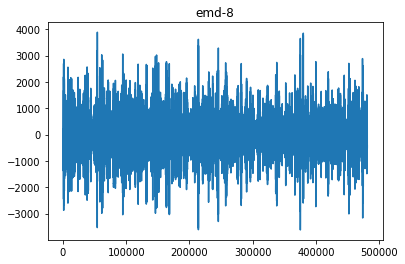

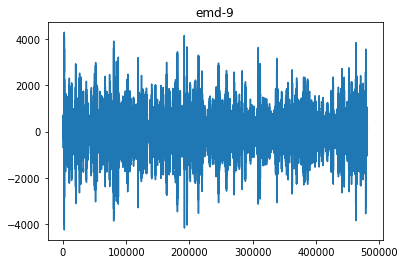

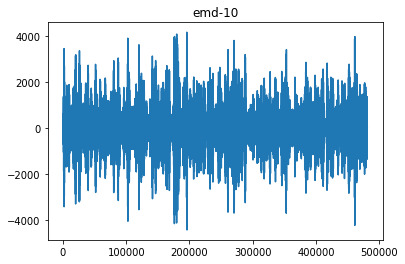

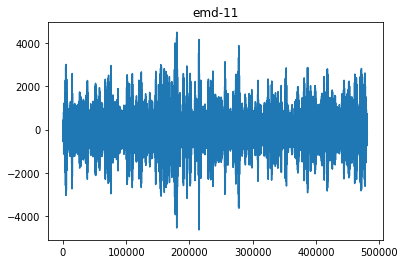

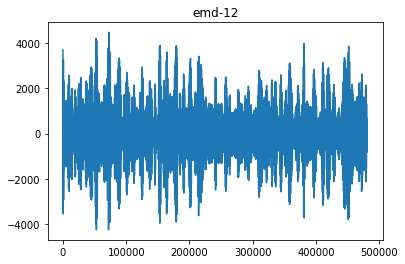

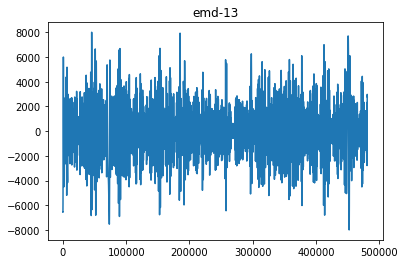

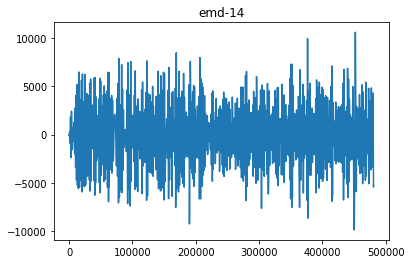

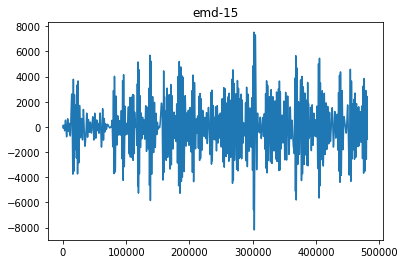

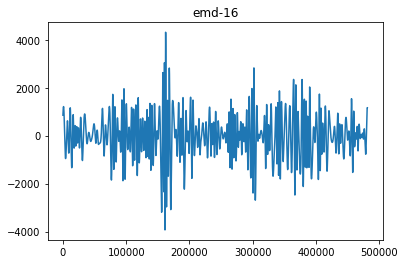

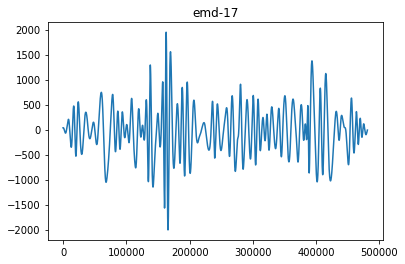

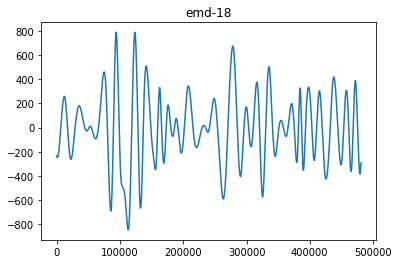

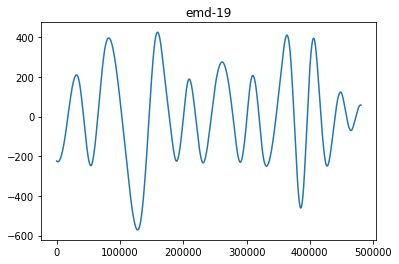

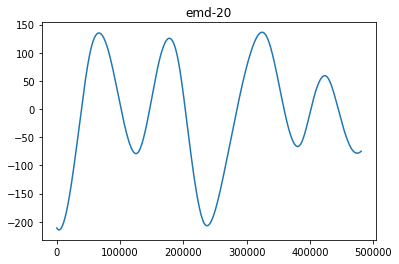

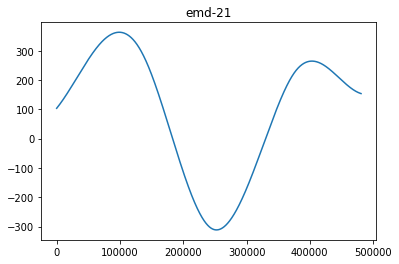

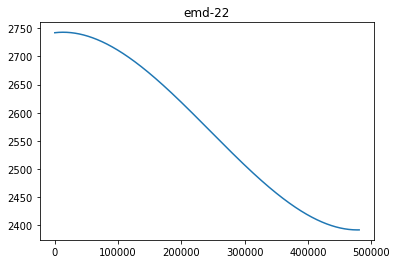

In [24]:
count = 0
for imf in imfs:
    count+=1
    plt.plot(imf)
    plt.title(f"emd-{count}")
    plt.savefig(f"{plot}imfs_auto_{count}.png")
    plt.show()